# Pymaceuticals Inc. Analysis
---
##### <ins>Ramicane - most effective in Tumor reduction in Male mice</ins>

<p><strong>x_value</strong>: Weight (g)</p>
<p><strong>y_value</strong>: Avg Tumor Volume (mm3)</p>
<p><strong>Slope (m)</strong>: 0.7820701527990966</p>
<p><strong>Y-intercept (b):</strong> 24.637188994977617</p>
<p><strong>Standard error of the estimate (SE):</strong> 0.9197158286838227</p>
<p><strong>R-squared:</strong> 0.8864234269219983</p>
<p><strong>P-value:</strong> 0.9999999999999787</p> 

<p>The results suggest a <strong>strong positive linear</strong> relationship between the independent and dependent variables, with a very high p-value indicating a statistically significant association.
A lower <strong>Standard Error</strong> at 0.91971 suggests a relatively <strong>tight fit</strong> of the regression model.    
The <strong>R-squared</strong> value of 0.8864 confirms that the linear model explains a significant portion of the variance in the data and indicates a <strong> very strong positive</strong> linear relationship between x_values and y_values.
A <strong>P-value</strong> of 0.9999999999999787 is <strong>extremely high</strong>, indicating that the observed positive association is almost certainly <strong>not due to chance</strong>. Lastly, the drug regimen of Ramicane has shown to significantly reduce tumor volume (mm3) on average compared to the other drug regimen trials, especially in Female mice.
</p>


##### <ins>Capomulin - most effective in Tumor reduction in Female mice</ins>

<p><strong>x_value</strong>: Weight (g)</p>
<p><strong>y_value</strong>: Avg Tumor Volume (mm3)</p>
<p><strong>Slope (m)</strong>: 0.8947726097340611</p>
<p><strong>Y-intercept (b):</strong> 22.764229983591935</p>
<p><strong>Standard error of the estimate (SE):</strong> 1.0249929158261613</p>
<p><strong>R-squared:</strong> 0.9034966277438602</p>
<p><strong>P-value:</strong> 0.9999999999999923</p> 

<p>The results suggest a <strong>strong positive linear</strong> relationship between the independent and dependent variables, with a very high p-value indicating a statistically significant association.
A lower <strong>Standard Error</strong> at 1.0249 suggests a relatively <strong>tight fit</strong> of the regression model.    
The <strong>R-squared</strong> value of 0.9034 confirms that the linear model explains a significant portion of the variance in the data and indicates a <strong> very strong positive</strong> linear relationship between x_values and y_values.
A <strong>P-value</strong> of 0.9999999999999923 is <strong>extremely high</strong>, indicating that the observed positive association is almost certainly <strong>not due to chance</strong>. Lastly, the drug regimen of Capomulin has shown to significantly reduce tumor volume (mm3) on average compared to the other drug regimen trials, especially in Female mice.
</p>

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [3]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Lets look at the data attributes and shape
print("Shape of the mouse metadata set is - ", mouse_metadata.shape)
print("---------------------------------------------------------------------------")
print("Shape of the study result set is - ", study_results.shape)

Shape of the mouse metadata set is -  (249, 5)
---------------------------------------------------------------------------
Shape of the study result set is -  (1893, 4)


In [4]:
# Combine the data into a single DataFrame
mouse_Study_Data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
print("Shape of the combined mouse study data set is - ", mouse_Study_Data.shape)
print("---------------------------------------------------------------------------")
mouse_Study_Data.head()

Shape of the combined mouse study data set is -  (1893, 8)
---------------------------------------------------------------------------


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Looking at the null values and other information of the merged data
mouse_Study_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


In [6]:
# Checking the number of mice.
mouse_count = mouse_Study_Data["Mouse ID"].nunique()
print("Total Mice counts used for the study is", mouse_count)
print("---------------------------------------------------------------------------")
print("Drug regimens tested in the study-")
print(mouse_Study_Data["Drug Regimen"].unique())
print("---------------------------------------------------------------------------")
print("Timepoints when Tumors were measured-")
print(mouse_Study_Data["Timepoint"].unique())

Total Mice counts used for the study is 249
---------------------------------------------------------------------------
Drug regimens tested in the study-
['Capomulin' 'Ketapril' 'Naftisol' 'Infubinol' 'Stelasyn' 'Ramicane'
 'Propriva' 'Zoniferol' 'Placebo' 'Ceftamin']
---------------------------------------------------------------------------
Timepoints when Tumors were measured-
[ 0  5 10 15 20 25 30 35 40 45]


In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicateIDs = mouse_Study_Data.loc[mouse_Study_Data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
print(duplicateIDs, "is/are the Mouse ID/s that have duplicates")

['g989'] is/are the Mouse ID/s that have duplicates


In [8]:
# Optional: Get all the data for the duplicate mouse ID.
duplicates = mouse_Study_Data[mouse_Study_Data['Mouse ID'].isin(duplicateIDs)]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
initial_row_count = len(mouse_Study_Data) 
mouse_Study_Data_clean = mouse_Study_Data.drop_duplicates(subset=['Mouse ID', 'Timepoint']) 
final_row_count = len(mouse_Study_Data_clean) 
dropped_count = initial_row_count - final_row_count
print(f"Initial row count:", initial_row_count) 
print(f"Final row count after dropping duplicates:",final_row_count) 
print(f"Number of rows dropped:", dropped_count)

Initial row count: 1893
Final row count after dropping duplicates: 1888
Number of rows dropped: 5


In [10]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean = mouse_Study_Data_clean["Mouse ID"].nunique()
if mouse_count_clean == mouse_count :
    print("We successfully dropped the",dropped_count,"duplicate rows and retained all",mouse_count_clean,"of the Mouse IDs, without dropping the originals")
else :
    print("We have wrongly dropped",mouse_count-mouse_count_clean,"Mouse ID/s")

We successfully dropped the 5 duplicate rows and retained all 249 of the Mouse IDs, without dropping the originals


## Summary Statistics

In [11]:
# **ADDITIONAL STEP**
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_study_clean_stats = mouse_Study_Data_clean.describe()
mouse_study_clean_stats

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,19.597458,50.449276,1.023835,12.792903,25.661547
std,14.084762,8.904565,1.138507,7.186737,3.926776
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.951421,1.000000,13.000000,27.000000
75%,30.000000,56.324075,2.000000,20.000000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [12]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
    # mean, median, variance, standard deviation, and SEM of the tumor volume.
    # Assemble the resulting series into a single summary DataFrame.

drug_regimen_count = mouse_Study_Data_clean.groupby('Drug Regimen')["Tumor Volume (mm3)"].count()
drug_regimen_mean = mouse_Study_Data_clean.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
drug_regimen_median = mouse_Study_Data_clean.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
drug_regimen_var = mouse_Study_Data_clean.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
drug_regimen_std = mouse_Study_Data_clean.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
drug_regimen_SEM = mouse_Study_Data_clean.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

drug_regimen_summary = pd.DataFrame({   "Tumor Vol. Count": drug_regimen_count,
                                        "Tumor Vol. Mean": drug_regimen_mean,
                                        "Tumor Vol. Median": drug_regimen_median,
                                        "Tumor Vol. Variance": drug_regimen_var,
                                        "Tumor Vol. Std.Deviation": drug_regimen_std,
                                        "Tumor Vol. SEM": drug_regimen_SEM
                                        })
drug_regimen_summary

,Tumor Vol. Count,Tumor Vol. Mean,Tumor Vol. Median,Tumor Vol. Variance,Tumor Vol. Std.Deviation,Tumor Vol. SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,156,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen_agg = mouse_Study_Data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
drug_regimen_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

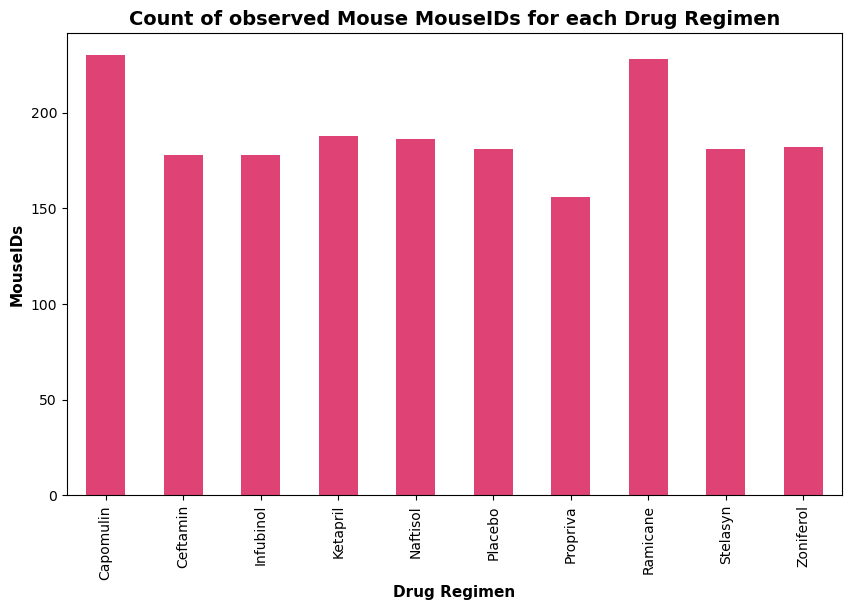

In [14]:
# Generate a bar plot showing the total number of rows Mouse ID for each drug regimen using Pandas.

drug_regimen_mouseID_count = mouse_Study_Data_clean.groupby(["Drug Regimen"])["Mouse ID"].count()

bar_plot = drug_regimen_mouseID_count.plot(kind="bar", color="#DF4375", figsize=(10, 6))

plt.title("Count of observed Mouse MouseIDs for each Drug Regimen",fontsize=14,fontweight='bold')

plt.xlabel("Drug Regimen", fontsize=11,fontweight='bold')
plt.ylabel("MouseIDs", fontsize=11,fontweight='bold')

plt.show()

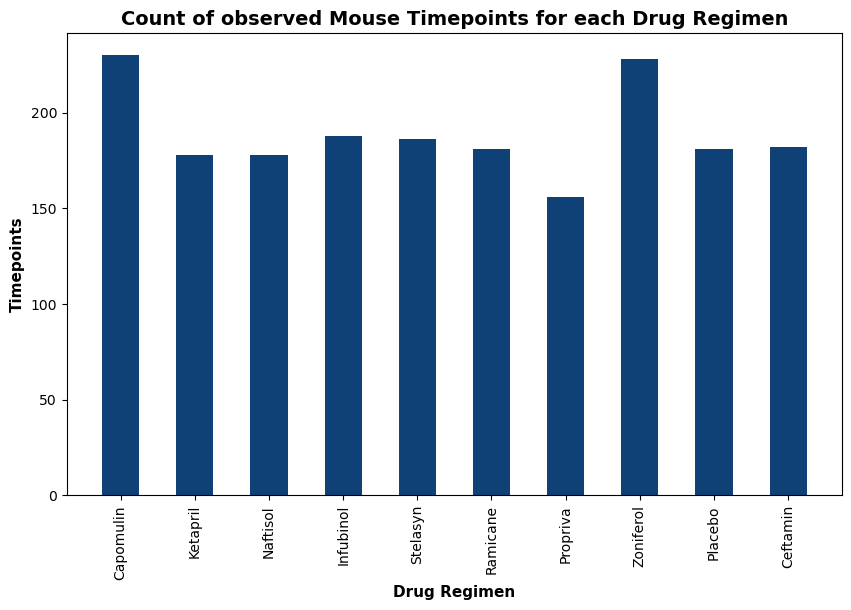

In [15]:
# Generate a bar plot showing the total number of rows Timepoints for each drug regimen using pyplot.

# Create an array for timepoints
drug_regimen_timepoint_count =mouse_Study_Data_clean.groupby(["Drug Regimen"])["Timepoint"].count()


# Bar pyplot
x_axis = mouse_Study_Data_clean["Drug Regimen"].unique()

fig1, ax1 = plt.subplots(figsize=(10, 6))

plt.bar(x_axis,drug_regimen_timepoint_count, color='#104176', width=0.5)


plt.xticks(rotation='vertical')
plt.title("Count of observed Mouse Timepoints for each Drug Regimen",fontsize=14,fontweight='bold')
plt.xlabel("Drug Regimen", fontsize=11,fontweight='bold')
plt.ylabel("Timepoints", fontsize=11,fontweight='bold')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

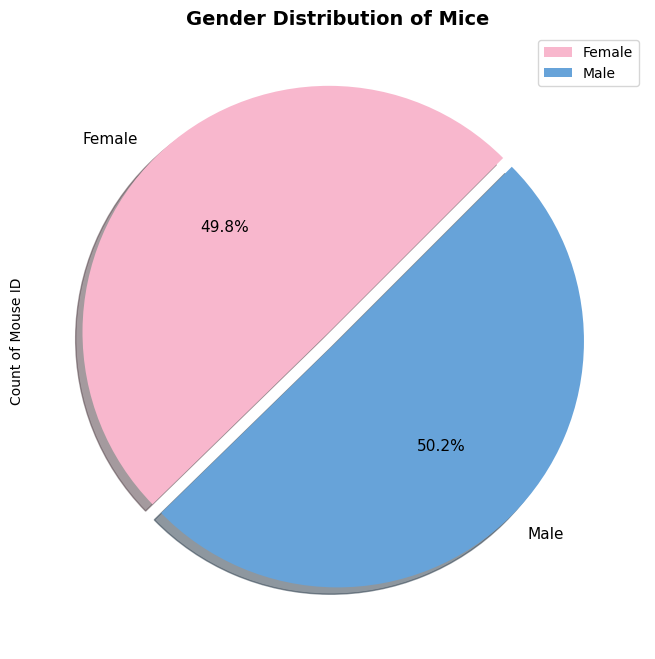

In [16]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_distribution_pd = mouse_Study_Data_clean.groupby("Sex")["Mouse ID"].nunique()

# Define colors for each slice
colors = ["#F8B7CD","#67A3D9"]

# Make the pie chart
gender_distribution_pd.plot(kind='pie',
                            autopct='%1.1f%%',
                            figsize=(8, 8),
                            legend=True,
                            fontsize=11,
                            colors=colors,
                            shadow=True,
                            explode=(0.05,0),
                            startangle=45,
                            ylabel=("Count of Mouse ID")
                            )

plt.title("Gender Distribution of Mice",fontsize=14,fontweight='bold')
plt.show

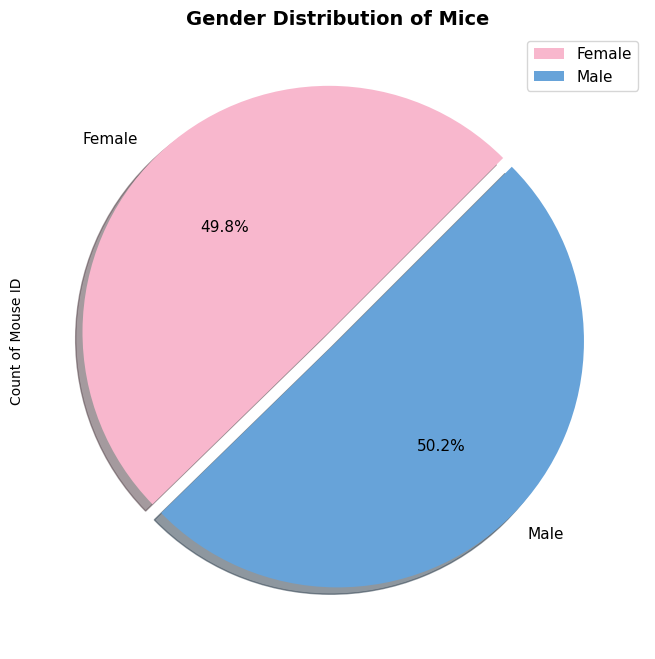

In [17]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_distribution_py = mouse_Study_Data_clean.groupby("Sex")["Mouse ID"].nunique()

# Define colors for each slice
colors = ["#F8B7CD","#67A3D9"]

# Make the pie chart
# Create a figure with subplots
fig, ax = plt.subplots(figsize=(8,8))

# Create a pie chart in the first subplot
wedges, texts, autotexts = ax.pie(gender_distribution_py, 
                                  colors=colors, 
                                  autopct='%1.1f%%', 
                                  startangle=45, 
                                  shadow=True, 
                                  explode=(0.05, 0),
                                  labels=gender_distribution_py.index
                                  )

# Customize font sizes 
for text in texts: 
    text.set_fontsize(11) 
# Set font size for labels 
for autotext in autotexts: 
    autotext.set_fontsize(11)

ax.set_ylabel("Count of Mouse ID")
ax.set_title("Gender Distribution of Mice",fontsize=14,fontweight='bold')
ax.legend(gender_distribution_py.index, loc="upper right",fontsize=11)
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# **ADDITIONAL STEP**
# Final Tumor volume at the last timepoint for each drug regime
max_timepoint=mouse_Study_Data_clean.groupby(["Drug Regimen"])["Timepoint"].idxmax()
final_tumor_volume = mouse_Study_Data_clean.loc[max_timepoint].set_index(["Drug Regimen"])
final_tumor_volume



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,b128,45,38.982878,2,Female,9,22
Ceftamin,l661,45,59.851956,3,Male,18,26
Infubinol,y163,45,67.685569,3,Female,17,27
Ketapril,p189,45,75.294936,4,Male,8,28
Naftisol,b559,45,73.051363,1,Male,20,26
Placebo,c282,45,65.815165,2,Male,12,27
Propriva,w350,45,64.957562,2,Male,7,26
Ramicane,n364,45,31.095335,1,Male,4,17
Stelasyn,a963,45,62.765093,1,Female,23,27


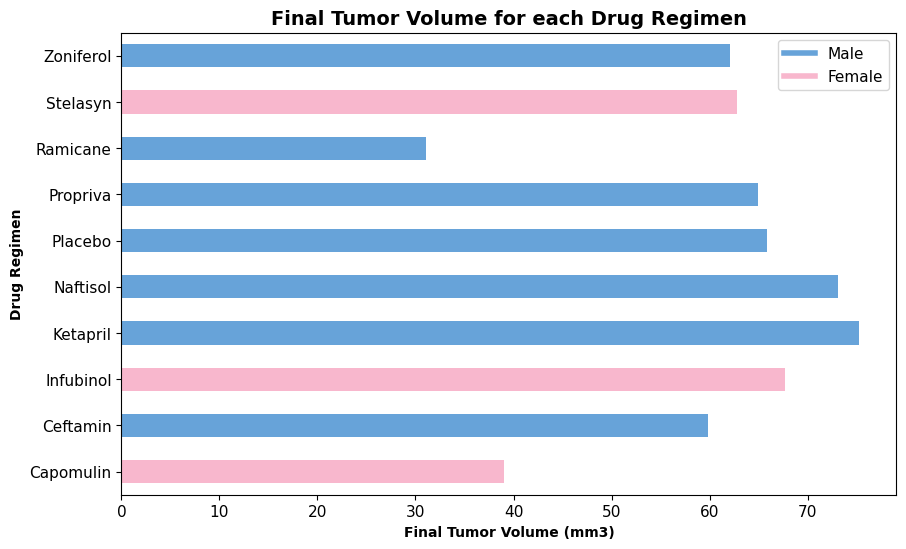

In [19]:
# **ADDITIONAL STEP** 
# Define color mapping based on sex
color_mapping = {'Male': "#67A3D9", 'Female': "#F8B7CD"} 
colors = final_tumor_volume['Sex'].map(color_mapping)

# Plot the sorted bar chart with colors based on sex
final_tumor_volume["Tumor Volume (mm3)"].plot(kind="barh", color=colors, figsize=(10, 6), fontsize=11)

plt.title("Final Tumor Volume for each Drug Regimen", fontsize=14,fontweight='bold')
plt.xlabel("Final Tumor Volume (mm3)", fontweight='bold')
plt.ylabel("Drug Regimen", fontweight='bold')

# Add legend 
handles = [plt.Line2D([0], [0], color=color_mapping[sex], lw=4) for sex in color_mapping] 
labels = list(color_mapping.keys()) 
plt.legend(handles, labels, fontsize=11)

plt.show()


In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = pd.DataFrame(mouse_Study_Data_clean.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={"Timepoint": "max_Timepoint"})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_timepoint_df = pd.merge(mouse_Study_Data_clean, last_timepoint_df, on='Mouse ID')

# Display results
final_timepoint_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),max_Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,f932,0,45.000000,0,Ketapril,Male,15,29,0
2,g107,0,45.000000,0,Ketapril,Female,2,29,35
3,a457,0,45.000000,0,Ketapril,Female,11,30,10
4,c819,0,45.000000,0,Ketapril,Male,21,25,40
...,...,...,...,...,...,...,...,...,...
1883,r944,45,41.581521,2,Capomulin,Male,12,25,45
1884,u364,45,31.023923,3,Capomulin,Male,18,17,45
1885,p438,45,61.433892,1,Ceftamin,Female,11,26,45
1886,x773,45,58.634971,4,Placebo,Female,21,30,45


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
drug_treatments_list = ["Capomulin","Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_values = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in drug_treatments_list:
  subset = final_timepoint_df[final_timepoint_df['Drug Regimen'] == treatment]
  q1 = subset['Tumor Volume (mm3)'].quantile(0.25)
  q3 = subset['Tumor Volume (mm3)'].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = subset[(subset['Tumor Volume (mm3)'] < lower_bound) | (subset['Tumor Volume (mm3)'] > upper_bound)]
  
  # Print the treatment and the number of outliers
  print(f"Treatment: {treatment}")
  print(f"IQR: {iqr}")
  print(f"Number of outliers: {len(outliers)}")
  print(f"Lower Bound: {(lower_bound)}")
  print(f"Upper Bound: {(upper_bound)}")
  print("=======================================")
  
  # Add tumor volume values to the list for plotting
  tumor_volume_values.append(subset['Tumor Volume (mm3)'].values)

Treatment: Capomulin
IQR: 7.314067135000002
Number of outliers: 2
Lower Bound: 26.714832162499995
Upper Bound: 55.9711007025
Treatment: Ramicane
IQR: 8.325365415
Number of outliers: 1
Lower Bound: 24.1865864625
Upper Bound: 57.488048122500004
Treatment: Infubinol
IQR: 10.002090667500006
Number of outliers: 0
Lower Bound: 32.309217298749985
Upper Bound: 72.31757996875001
Treatment: Ceftamin
IQR: 9.593010457500007
Number of outliers: 0
Lower Bound: 32.81891142624998
Upper Bound: 71.19095325625001


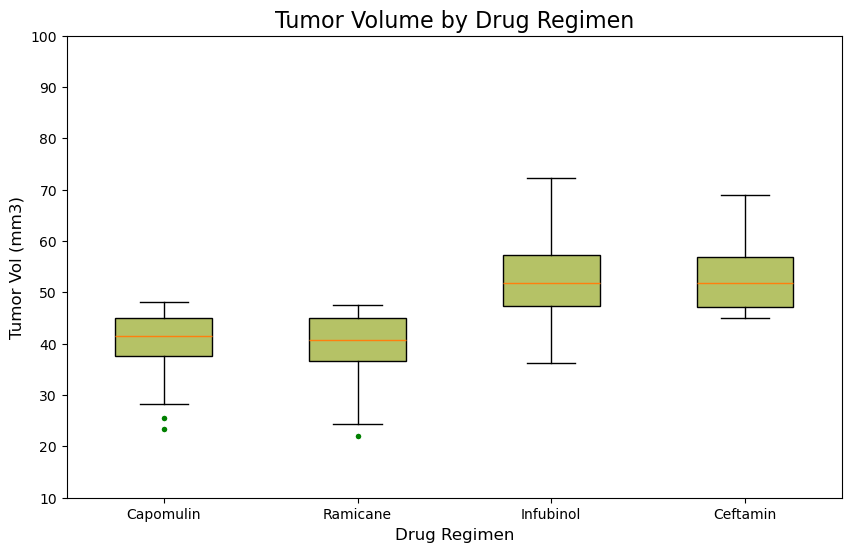

In [22]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group

# Show outliers on boxplot for visibility
outlier_design = dict(marker="o", markerfacecolor="green", markersize=5, markeredgecolor="white")

# Create Boxplot
plt.figure(figsize=(10, 6)) 
plt.boxplot(tumor_volume_values, widths=0.5, patch_artist=True, boxprops=dict(facecolor="#B5C266"), flierprops=outlier_design)
plt.title('Tumor Volume by Drug Regimen', fontsize= 16)
plt.xlabel('Drug Regimen', fontsize=12) 
plt.ylabel('Tumor Vol (mm3)', fontsize=12)

plt.xticks([1,2,3,4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
#plt.xlim(-0.95, len(x_axis)+2)
plt.ylim(10, 100)

plt.show()

## Line and Scatter Plots

In [23]:
# Select a mouse ID with maximum tumor reduction with in the Capomulin drug regimen to line plot
# Filter the DataFrame for the "Capomulin" drug regimen
capomulin_df = mouse_Study_Data_clean[mouse_Study_Data_clean["Drug Regimen"] == "Capomulin"]

# Filter the DataFrame for rows where the timepoint is 45
capomulin_tp45 = capomulin_df.loc[capomulin_df["Timepoint"] == 45]

# Filter the DataFrame for rows where the timepoint is 0
capomulin_tp0 = capomulin_df.loc[capomulin_df["Timepoint"] == 0]

# Merge the DataFrames on "Mouse ID"
capomulin_tp0_tp45 = pd.merge(capomulin_tp0, capomulin_tp45, on="Mouse ID", suffixes=('_0', '_45'))

# Calculate the difference in tumor volume between the two timepoints
capomulin_tp0_tp45["Tumor Volume Difference"] = capomulin_tp0_tp45["Tumor Volume (mm3)_0"] - capomulin_tp0_tp45["Tumor Volume (mm3)_45"]

# Identify the mouse ID with the maximum difference
max_diff_mouse_id = capomulin_tp0_tp45.loc[capomulin_tp0_tp45["Tumor Volume Difference"].idxmax(), "Mouse ID"]
max_diff_value = capomulin_tp0_tp45.loc[capomulin_tp0_tp45["Tumor Volume Difference"].idxmax(), "Tumor Volume Difference"]

print("Selecting Mouse ID",max_diff_mouse_id,"with the maximum tumor volume difference of",max_diff_value,"between timepoints 0 and 45, to plot the Graph")

Selecting Mouse ID s185 with the maximum tumor volume difference of 21.65640213 between timepoints 0 and 45, to plot the Graph


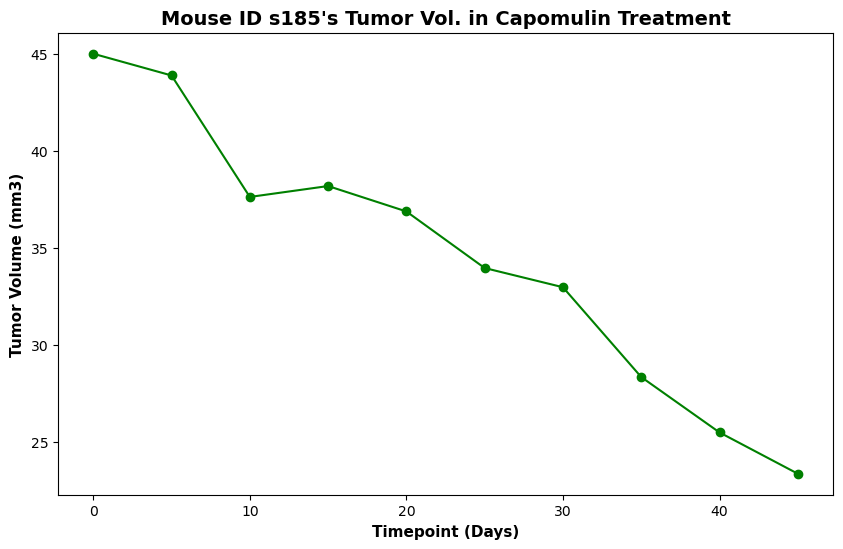

In [24]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Identify specific mouse ID and get data of the mouse id
mouse_id = max_diff_mouse_id
Capomulin_plot = capomulin_df.loc[capomulin_df['Mouse ID'] == mouse_id]

# Generate a line plot
plt.figure(figsize=(10,6))
time_vol = plt.plot(Capomulin_plot['Timepoint'], Capomulin_plot['Tumor Volume (mm3)'], marker='o', color='Green')

# Set x/y label, title
plt.title(f"Mouse ID {mouse_id}'s Tumor Vol. in Capomulin Treatment", fontweight='bold',fontsize=14)
plt.xlabel('Timepoint (Days)', fontweight='bold',fontsize=11)
plt.ylabel('Tumor Volume (mm3)', fontweight='bold',fontsize=11)

# Present the box plot chart
plt.show()


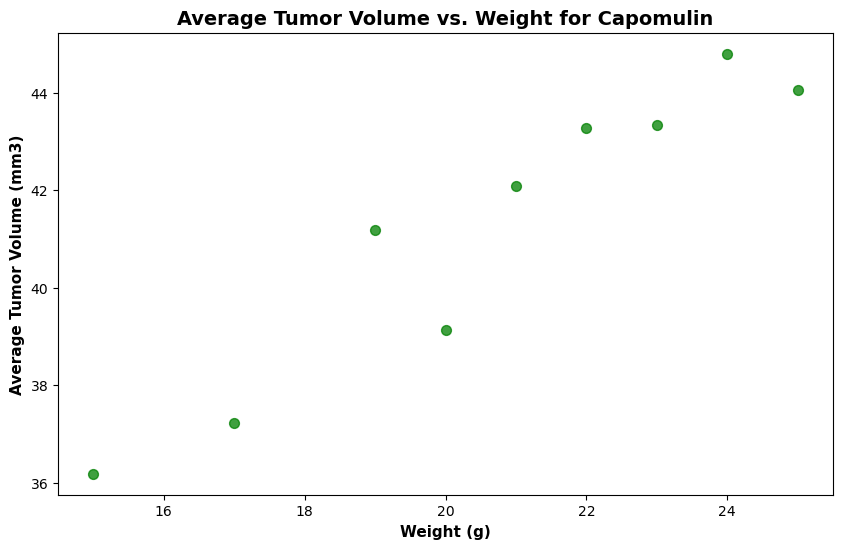

,Weight (g),Tumor Volume (mm3)
0,15,36.182040
1,17,37.214133
2,19,41.182391
3,20,39.141053
4,21,42.088700
5,22,43.288490
6,23,43.341051
7,24,44.805810
8,25,44.062109


In [25]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Calculate average tumor volume per weight group
avg_wgt_tum_vol_cap = capomulin_df.groupby('Weight (g)')['Tumor Volume (mm3)'].mean()

# Create the scatter plot
# Set figure size
plt.figure(figsize=(10, 6)) 

# Customize plot
plt.scatter(avg_wgt_tum_vol_cap.index, avg_wgt_tum_vol_cap.values, s=50, c='green', alpha=0.75)  

# Add labels and title
plt.xlabel('Weight (g)',fontweight='bold',fontsize=11)
plt.ylabel('Average Tumor Volume (mm3)',fontweight='bold',fontsize=11)
plt.title('Average Tumor Volume vs. Weight for Capomulin',fontweight='bold',fontsize=14)

# Display the plot
plt.show()

avg_wgt_tum_df = pd.DataFrame(avg_wgt_tum_vol_cap)

# Dispay Dataframe
avg_wgt_tum_df

# Rese the index of the dataframe
new_index_avg_wgt_df = avg_wgt_tum_df.reset_index()

# Display new index dataframe
new_index_avg_wgt_df

## Correlation and Regression

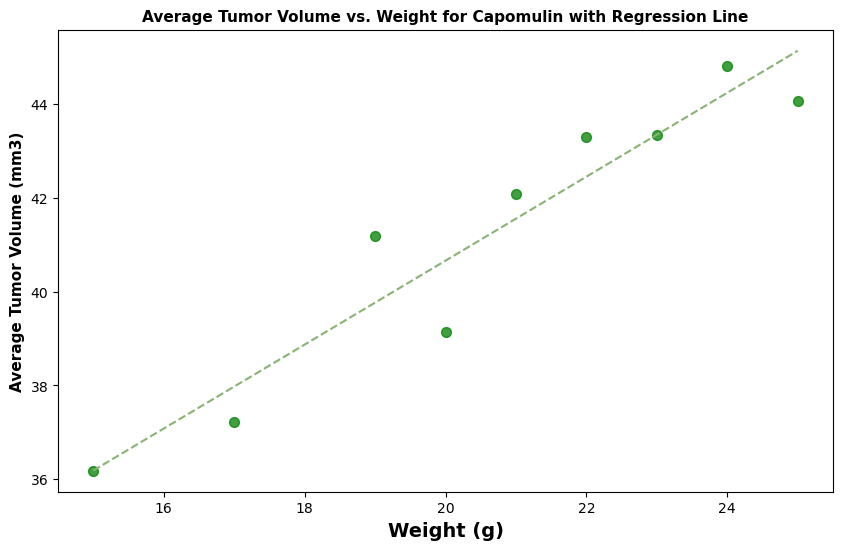

Slope (m): 0.8947726097340611
Y-intercept (b): 22.764229983591935
Standard error of the estimate (SE): 1.0249929158261613
R-squared: 0.9034966277438602
P-value: 0.9999999999999923
Linear Equation: y = 0.8947726097340611(X) + 22.764229983591935


In [26]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the linear regression line
m, b = np.polyfit(avg_wgt_tum_vol_cap.index, avg_wgt_tum_vol_cap.values, 1)

# Create the scatter plot
plt.figure(figsize=(10, 6)) 

# Customize plot
plt.scatter(avg_wgt_tum_vol_cap.index, avg_wgt_tum_vol_cap.values, s=50, c='green', alpha=0.75)
plt.plot(avg_wgt_tum_vol_cap.index, m * avg_wgt_tum_vol_cap.index + b, color='#89B374',linestyle='--')

# Add labels and title
plt.xlabel('Weight (g)',fontweight='bold',fontsize=14)
plt.ylabel('Average Tumor Volume (mm3)',fontweight='bold',fontsize=11)
plt.title('Average Tumor Volume vs. Weight for Capomulin with Regression Line',fontweight='bold',fontsize=11)

# Display the plot
plt.show()

# Calculate residuals
residuals = new_index_avg_wgt_df['Tumor Volume (mm3)'] - (m * new_index_avg_wgt_df['Weight (g)'] + b)

# Calculate standard error of the estimate (SSE)
sse = np.sum(residuals**2)

# Calculate degrees of freedom
df_freedom = len(new_index_avg_wgt_df) - 2  # 2 for slope and intercept

# Calculate mean squared error (MSE)
mse = sse / df_freedom

# Calculate standard error of the estimate (SE)
se = np.sqrt(mse)

# Calculate r-squared
r_squared = 1 - (sse / np.sum((new_index_avg_wgt_df['Tumor Volume (mm3)'] - new_index_avg_wgt_df['Tumor Volume (mm3)'].mean())**2))

# Calculate p-value
from scipy import stats
t_stat, p_value = stats.ttest_rel(new_index_avg_wgt_df['Tumor Volume (mm3)'], (m * new_index_avg_wgt_df['Weight (g)'] + b))

# Print results
print(f"Slope (m): {m}")
print(f"Y-intercept (b): {b}")
print(f"Standard error of the estimate (SE): {se}")
print(f"R-squared: {r_squared}")
print(f"P-value: {p_value}")
print(f"Linear Equation: y = {m}(X) + {b}")

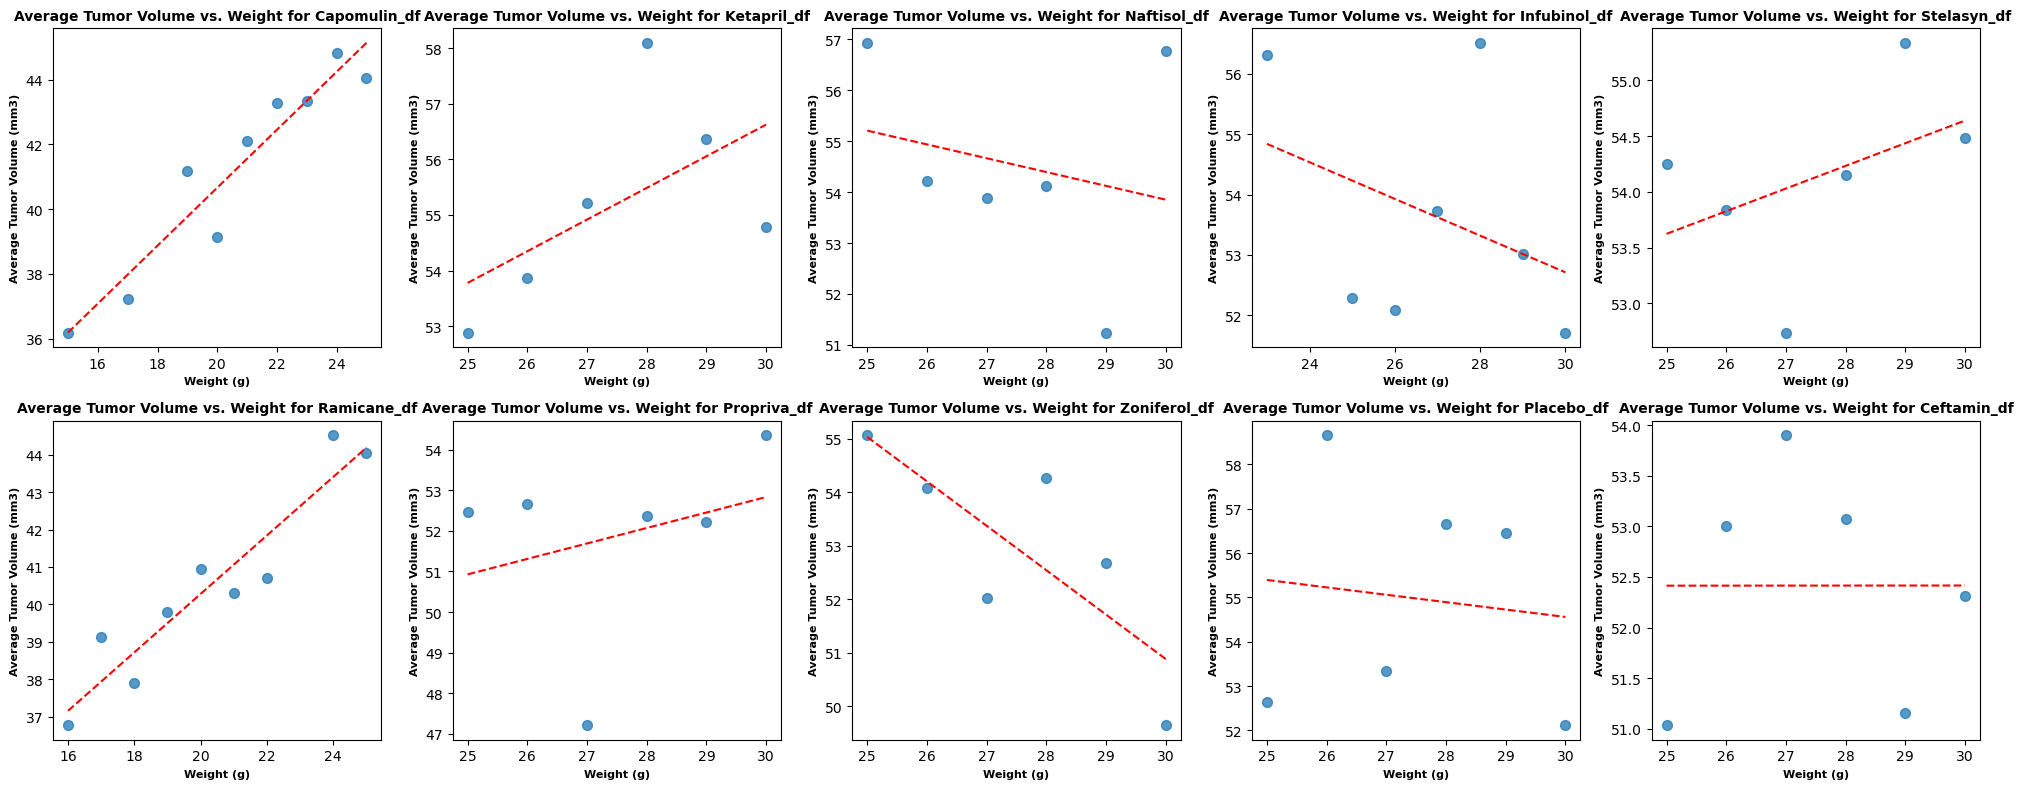

In [27]:
# Plotting regression slopes for all drugs
# 1 - Creating the data frames for each drug regimen and store the names in a list
# Get unique categories
categories = mouse_Study_Data_clean['Drug Regimen'].unique()

# Create a list to store the names of the DataFrames
df_names = []

# Create DataFrames with dynamic names and store the names in the list
for category in categories:
    df_name = f"{category}_df"
    globals()[df_name] = mouse_Study_Data_clean[mouse_Study_Data_clean['Drug Regimen'] == category]
    df_names.append(df_name)

# Calculate average tumor volume per weight group for each drug regimen
avg_tumor_volumes_per_weight = {}

for df_name in df_names:
    avg_tumor_volumes_per_weight[df_name] = globals()[df_name].groupby('Weight (g)')['Tumor Volume (mm3)'].mean()

# Create a grid of plots with 10 plots in 2 rows and 5 columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each drug regimen in a separate subplot
for i, (df_name, avg_tumor_vol) in enumerate(avg_tumor_volumes_per_weight.items()):
    # Calculate the linear regression line
    m, b = np.polyfit(avg_tumor_vol.index, avg_tumor_vol.values, 1)
    
    # Create the scatter plot
    axes[i].scatter(avg_tumor_vol.index, avg_tumor_vol.values, s=50, alpha=0.75)
    axes[i].plot(avg_tumor_vol.index, m * avg_tumor_vol.index + b, linestyle='--', color='red')
    
    # Add labels and title
    axes[i].set_title(f'Average Tumor Volume vs. Weight for {df_name}', fontsize=10, fontweight='bold')
    axes[i].set_xlabel('Weight (g)', fontsize=8, fontweight='bold')
    axes[i].set_ylabel('Average Tumor Volume (mm3)', fontsize=8, fontweight='bold')

# Remove any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [37]:
# Create a list to store the regression results
regression_results = []

# Calculate regression statistics for each drug regimen
for df_name, avg_tumor_vol in avg_tumor_volumes_per_weight.items():
    # Calculate the linear regression line
    m, b = np.polyfit(avg_tumor_vol.index, avg_tumor_vol.values, 1)
    
    # Calculate residuals
    residuals = avg_tumor_vol - (m * avg_tumor_vol.index + b)
    
    # Calculate standard error of the estimate (SSE)
    sse = np.sum(residuals**2)
    
    # Calculate degrees of freedom
    df_freedom = len(avg_tumor_vol) - 2  # 2 for slope and intercept
    
    # Calculate mean squared error (MSE)
    mse = sse / df_freedom
    
    # Calculate standard error of the estimate (SE)
    se = np.sqrt(mse)
    
    # Calculate r-squared
    r_squared = 1 - (sse / np.sum((avg_tumor_vol - avg_tumor_vol.mean())**2))
    
    # Calculate p-value
    t_stat, p_value = stats.ttest_rel(avg_tumor_vol, (m * avg_tumor_vol.index + b))
    
    # Linear equation
    linear_eq = f"y = {m:.2f}x + {b:.2f}"
    
    # Append results to the list
    regression_results.append({
        'Drug Regimen': df_name,
        'Slope (m)': m,
        'Y-intercept (b)': b,
        'Standard error (SE)': se,
        'R-squared': r_squared,
        'P-value': p_value,
        'Linear Equation': linear_eq
    })

# Create a DataFrame from the regression results
regression_df = pd.DataFrame(regression_results)

# Display the DataFrame
regression_df


,Drug Regimen,Slope (m),Y-intercept (b),Standard error (SE),R-squared,P-value,Linear Equation
0,Capomulin_df,0.894773,22.764230,1.024993,9.034966e-01,1.0,y = 0.89x + 22.76
1,Ketapril_df,0.569387,39.542360,1.688032,3.323424e-01,1.0,y = 0.57x + 39.54
2,Naftisol_df,-0.271421,61.993826,2.293126,5.775273e-02,1.0,y = -0.27x + 61.99
3,Infubinol_df,-0.303574,61.820479,2.022578,1.357341e-01,1.0,y = -0.30x + 61.82
4,Stelasyn_df,0.203316,48.540154,0.852131,1.993996e-01,1.0,y = 0.20x + 48.54
5,Ramicane_df,0.782070,24.637189,0.919716,8.864234e-01,1.0,y = 0.78x + 24.64
6,Propriva_df,0.381325,41.395520,2.585225,8.691285e-02,1.0,y = 0.38x + 41.40
7,Zoniferol_df,-0.830702,75.799960,1.347579,6.244121e-01,1.0,y = -0.83x + 75.80
8,Placebo_df,-0.166831,59.564360,2.932508,1.396194e-02,1.0,y = -0.17x + 59.56
9,Ceftamin_df,0.000349,52.405280,1.273761,3.293521e-07,1.0,y = 0.00x + 52.41
